# HopHacks

Created 2021/09/17  
Authors: A.S., P.B., Y.P.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial  import distance as dist 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity as cos_sim
from getKeyWords import getKeyWords as gkw
from sklearn.neighbors import KDTree
from sklearn.gaussian_process.kernels import Matern, RBF,  ConstantKernel
import networkx as nx
import csv

# import nltk as nltk
# nltk.download('punkt')

### Toy Examples

In [2]:
c1 = ["This course is an introduction to stochastic differential equations and applications."
      " Basic topics to be reviewed include Ito and Stratonovich integrals, Ito formula,"
      " SDEs and their integration. The course will focus on diffusion processes and diffusion theory,"
      " with topics include Markov properties, generator, Kolmogrov’s equations (Fokker-Planck equation),"
      " Feynman-Kac formula, the martingale problem, Girsanov theorem, stability and ergodicity."
      " The course will briefly introduce applications, with topics include statistical "
      "inference of SDEs, filtering and control."]


c2= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models. The stochastic models may include classical time-series models, "
     "Markov chains and diffusion models. The basic simulation techniques covered will be"
     " useful in sample-generation of random variables, vectors and stochastic processes,"
     " and as advanced techniques, importance sampling, particle filtering and Bayesian"
     " computation may be discussed."]


c3=  ["The course covers fundamental mathematical ideas for certain approximation"
      "and statistical learning problems in high dimensions. We start with basic approximation"
      "theory in low-dimensions, in particular linear and nonlinear approximation by Fourier "
      "and wavelets in classical smoothness spaces, and discuss applications in imaging,"
      " inverse problems and PDE’s. We then introduce notions of complexity of function spaces,"
      " which will be important in statistical learning. We then move to basic problems in"
      " statistical learning, such as regression and density estimation. The interplay between"
      " randomness and approximation theory is introduced, as well as fundamental tools such as"
      " concentration inequalities, basic random matrix theory, and various estimators are"
      "constructed in detail, in particular multi scale estimators. At all times we consider"
      " the geometric aspects and interpretations, and will discuss concentration of"
      " measure phenomena, embedding of metric spaces, optimal transportation distances,"
      " and their applications to problems in machine learning such as manifold learning "
      "and dictionary learning for signal processing."]
      
c4= ["Data mining is a relatively new term used in the academic and business world, "
     "often associated with the development and quantitative analysis of very large"
     " databases. Its definition covers a wide spectrum of analytic and information "
     "technology topics, such as machine learning, artificial intelligence,"
     " statistical modeling, and efficient database development."
     " This course will review these broad topics, and cover specific analytic"
     " and modeling techniques such as advanced data visualization, decision trees,"
     "neural networks, nearest neighbor, clustering, logistic regression,"
     " and association rules. Although some of the mathematics underlying"
     " these techniques will be discussed, our focus will be on the application "
     "of the techniques to real data and the interpretation of results."
     " Because use of the computer is extremely important when “mining” large amounts of data,"
     "we will make substantial use of data mining software tools to learn "
     "the techniques and analyze datasets."]
     
c5=["By employing fundamental concepts from diverse areas of research,"
    " such as statistics, signal processing, biophysics, biochemistry,"
    " cell biology, and epidemiology, this course introduces a multidisciplinary"
    " and rigorous approach to the modeling and computational analysis of complex "
    "interaction networks. Topics to be covered include: overview of complex nonlinear"
    "interaction networks and their applications, graph-theoretic representations "
    "of network topology and stoichiometry, stochastic modeling of dynamic processes on"
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]


# c6= ["The objective of the course is to survey essential simulation techniques for popular"
#      " stochastic models. The stochastic models may include classical time-series models, "
#      "Markov chains and diffusion models. The basic simulation techniques covered will be"
#      " useful in sample-generation of random variables, vectors and stochastic processes,"
#      " and as advanced techniques, importance sampling, particle filtering and Bayesian"
#      " computation may be discussed."]

c6= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models.  "
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]




In [3]:
descriptions = pd.read_excel('courseInfo.xlsx')

descriptions = descriptions[descriptions.description.notnull()]


desc1 =list(descriptions['description'].values)
course_name1 =list(descriptions['courseName'].values)
course_cod1 =list(descriptions['courseNum'].values)

N_samples = len(desc1)

In [4]:
stopwords = np.load('stopwords.npy')

def filtering(c):
    return list(gkw(c[0], stopwords, 20))

In [5]:
# c_list=[c1,c2,c3,c4, c5, c6]

# N_samples = len(c_list)

# #Need a way to do this automatically    
# c_all = filtering(c1)+filtering(c2)+filtering(c3)+filtering(c4)+filtering(c5)+filtering(c6)

In [6]:
N_desc = len(desc1)

desc_all =  ['']
title_all = ['']
# desc_all =  ''

for i in range(0,N_desc):
    
    desc_all += filtering([desc1[i]])
    title_all += filtering([course_name1[i]])
    
    
#         desc_all += desc1[i]
        
        
desc_all = desc_all+title_all

### Creating Vocabulary and Indexing

In [7]:
vectorizer = CountVectorizer()

In [8]:
# vectorizer.fit(c_all)
vectorizer.fit(desc_all)

vocc =vectorizer.vocabulary_

N_voc = len(vocc)

N_voc

1957

### Vectorizing the texts

In [10]:
Vectors = np.zeros([N_samples, N_voc])


for i in range(N_samples):

#     Vectors[i,:] = vectorizer.transform(c_list[i]).toarray().ravel()
    Vectors[i,:] = vectorizer.transform([desc1[i]]).toarray().ravel()
    
    
# fig, ax = plt.subplots()
# ax.plot(Vectors[90])

###  Description Similarity

<IPython.core.display.Javascript object>


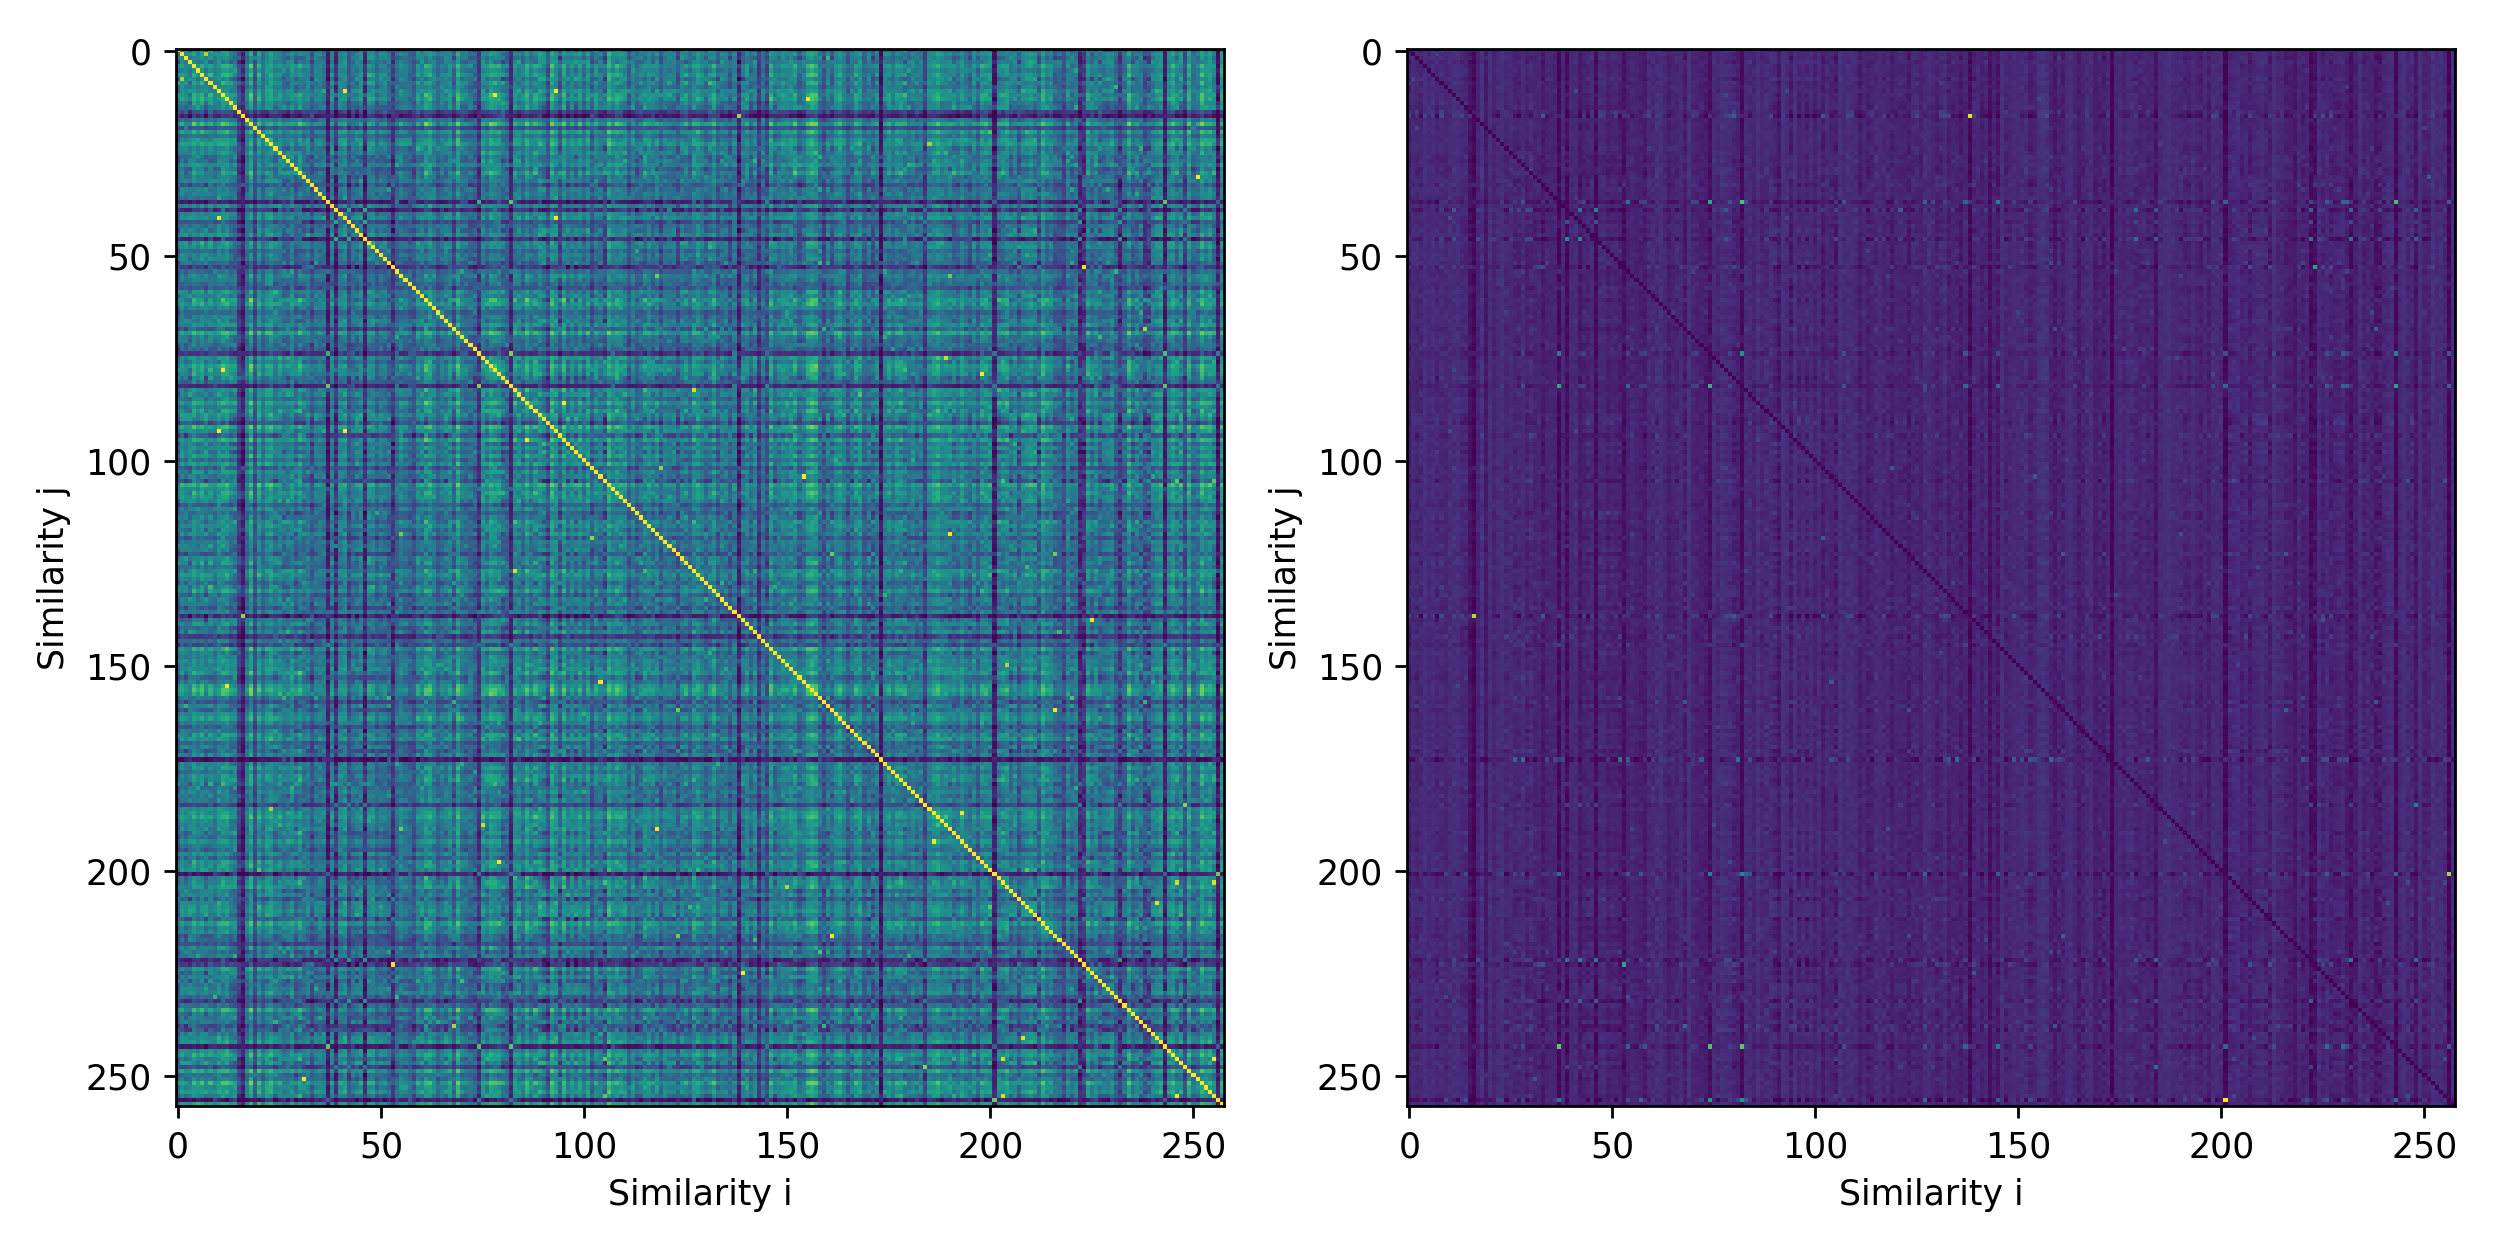

Text(0, 0.5, 'Similarity j')

In [11]:
# K1 = Vectors @ Vectors.T

# K1 = dist.squareform( dist.pdist(Vectors, metric='euclidean'))

K1= cos_sim(Vectors)

K1_nod = K1 -np.eye(N_samples)

D=np.sum(K1_nod, axis=1)

D_inv = np.diag(1.0 / (D))

K1_norm = D_inv @ K1_nod

fig, ax = plt.subplots(figsize=[10,5], tight_layout=True, nrows=1, ncols=2)
ax[0].imshow(K1, aspect='auto')

ax[0].set_xlabel('Similarity i')
ax[0].set_ylabel('Similarity j')

ax[1].imshow(K1_norm, aspect='auto')

ax[1].set_xlabel('Similarity i')
ax[1].set_ylabel('Similarity j')

<IPython.core.display.Javascript object>


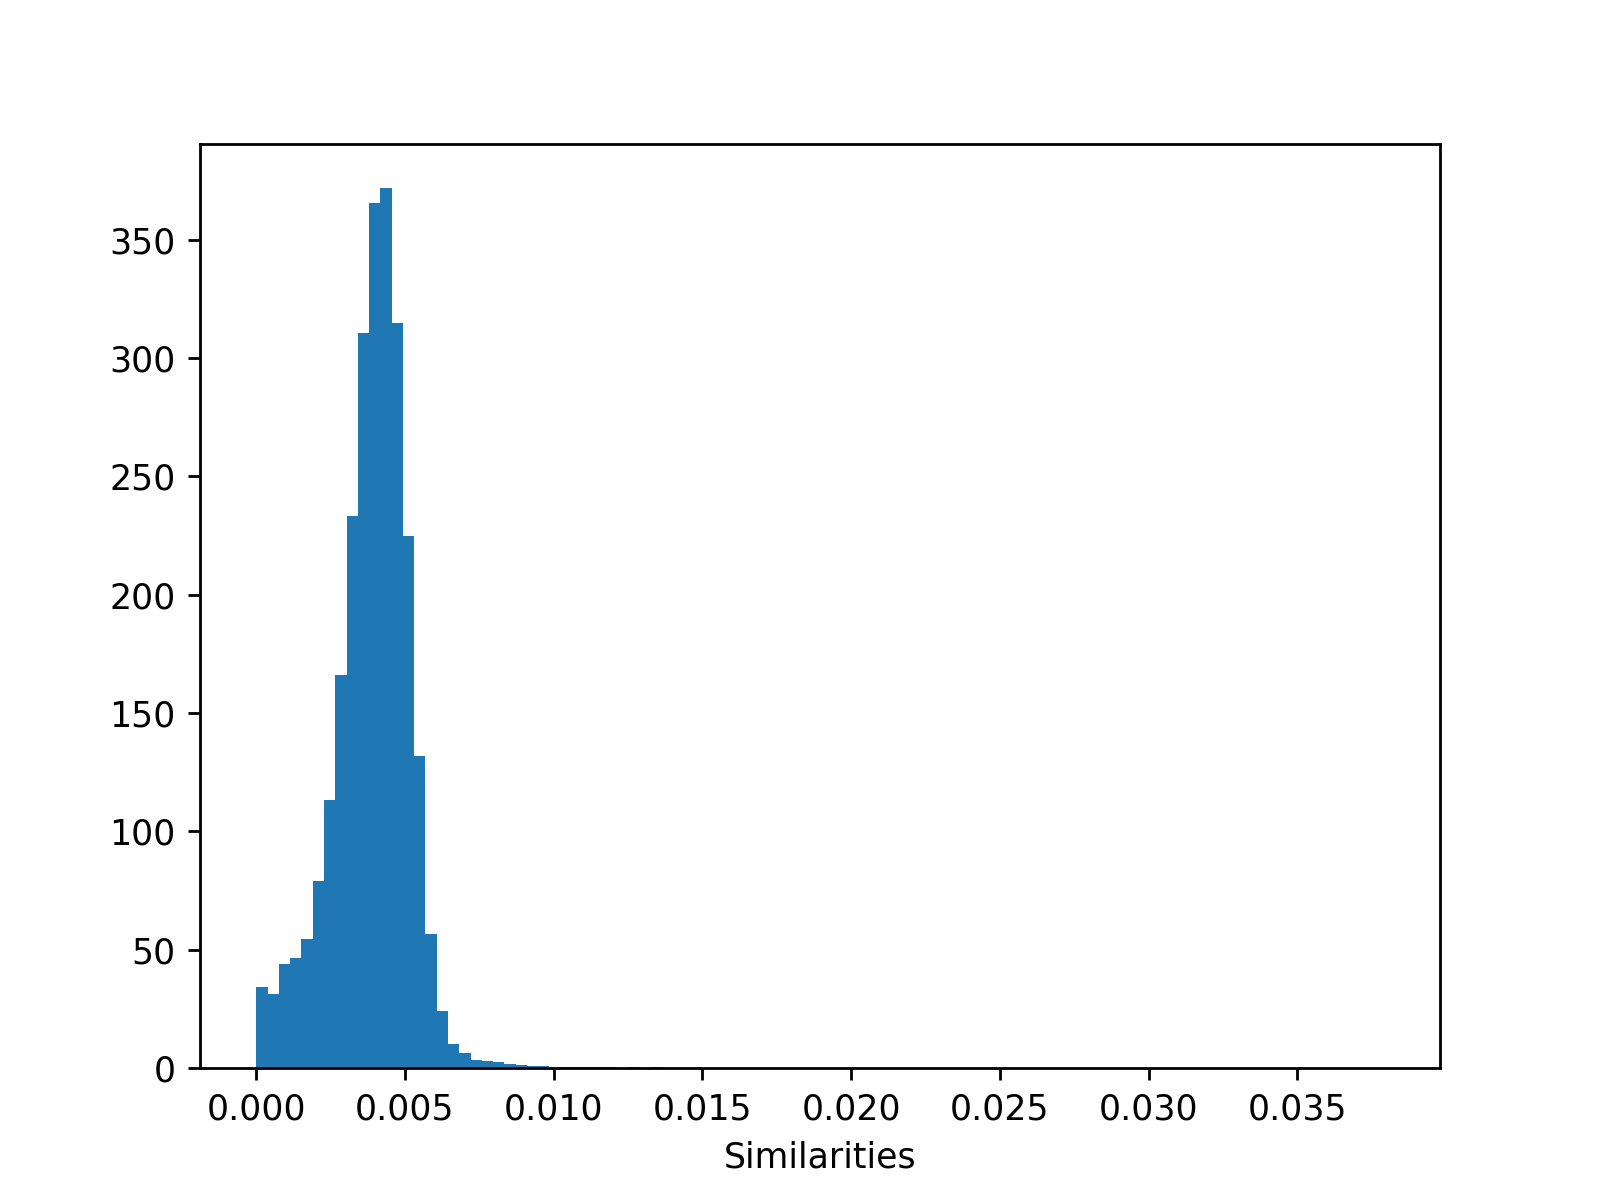

Text(0.5, 0, 'Similarities')

In [12]:
fig, ax = plt.subplots()
ax.hist(K1_norm.ravel(), density=True, bins=100);
ax.set_xlabel('Similarities')

### Title text

<IPython.core.display.Javascript object>


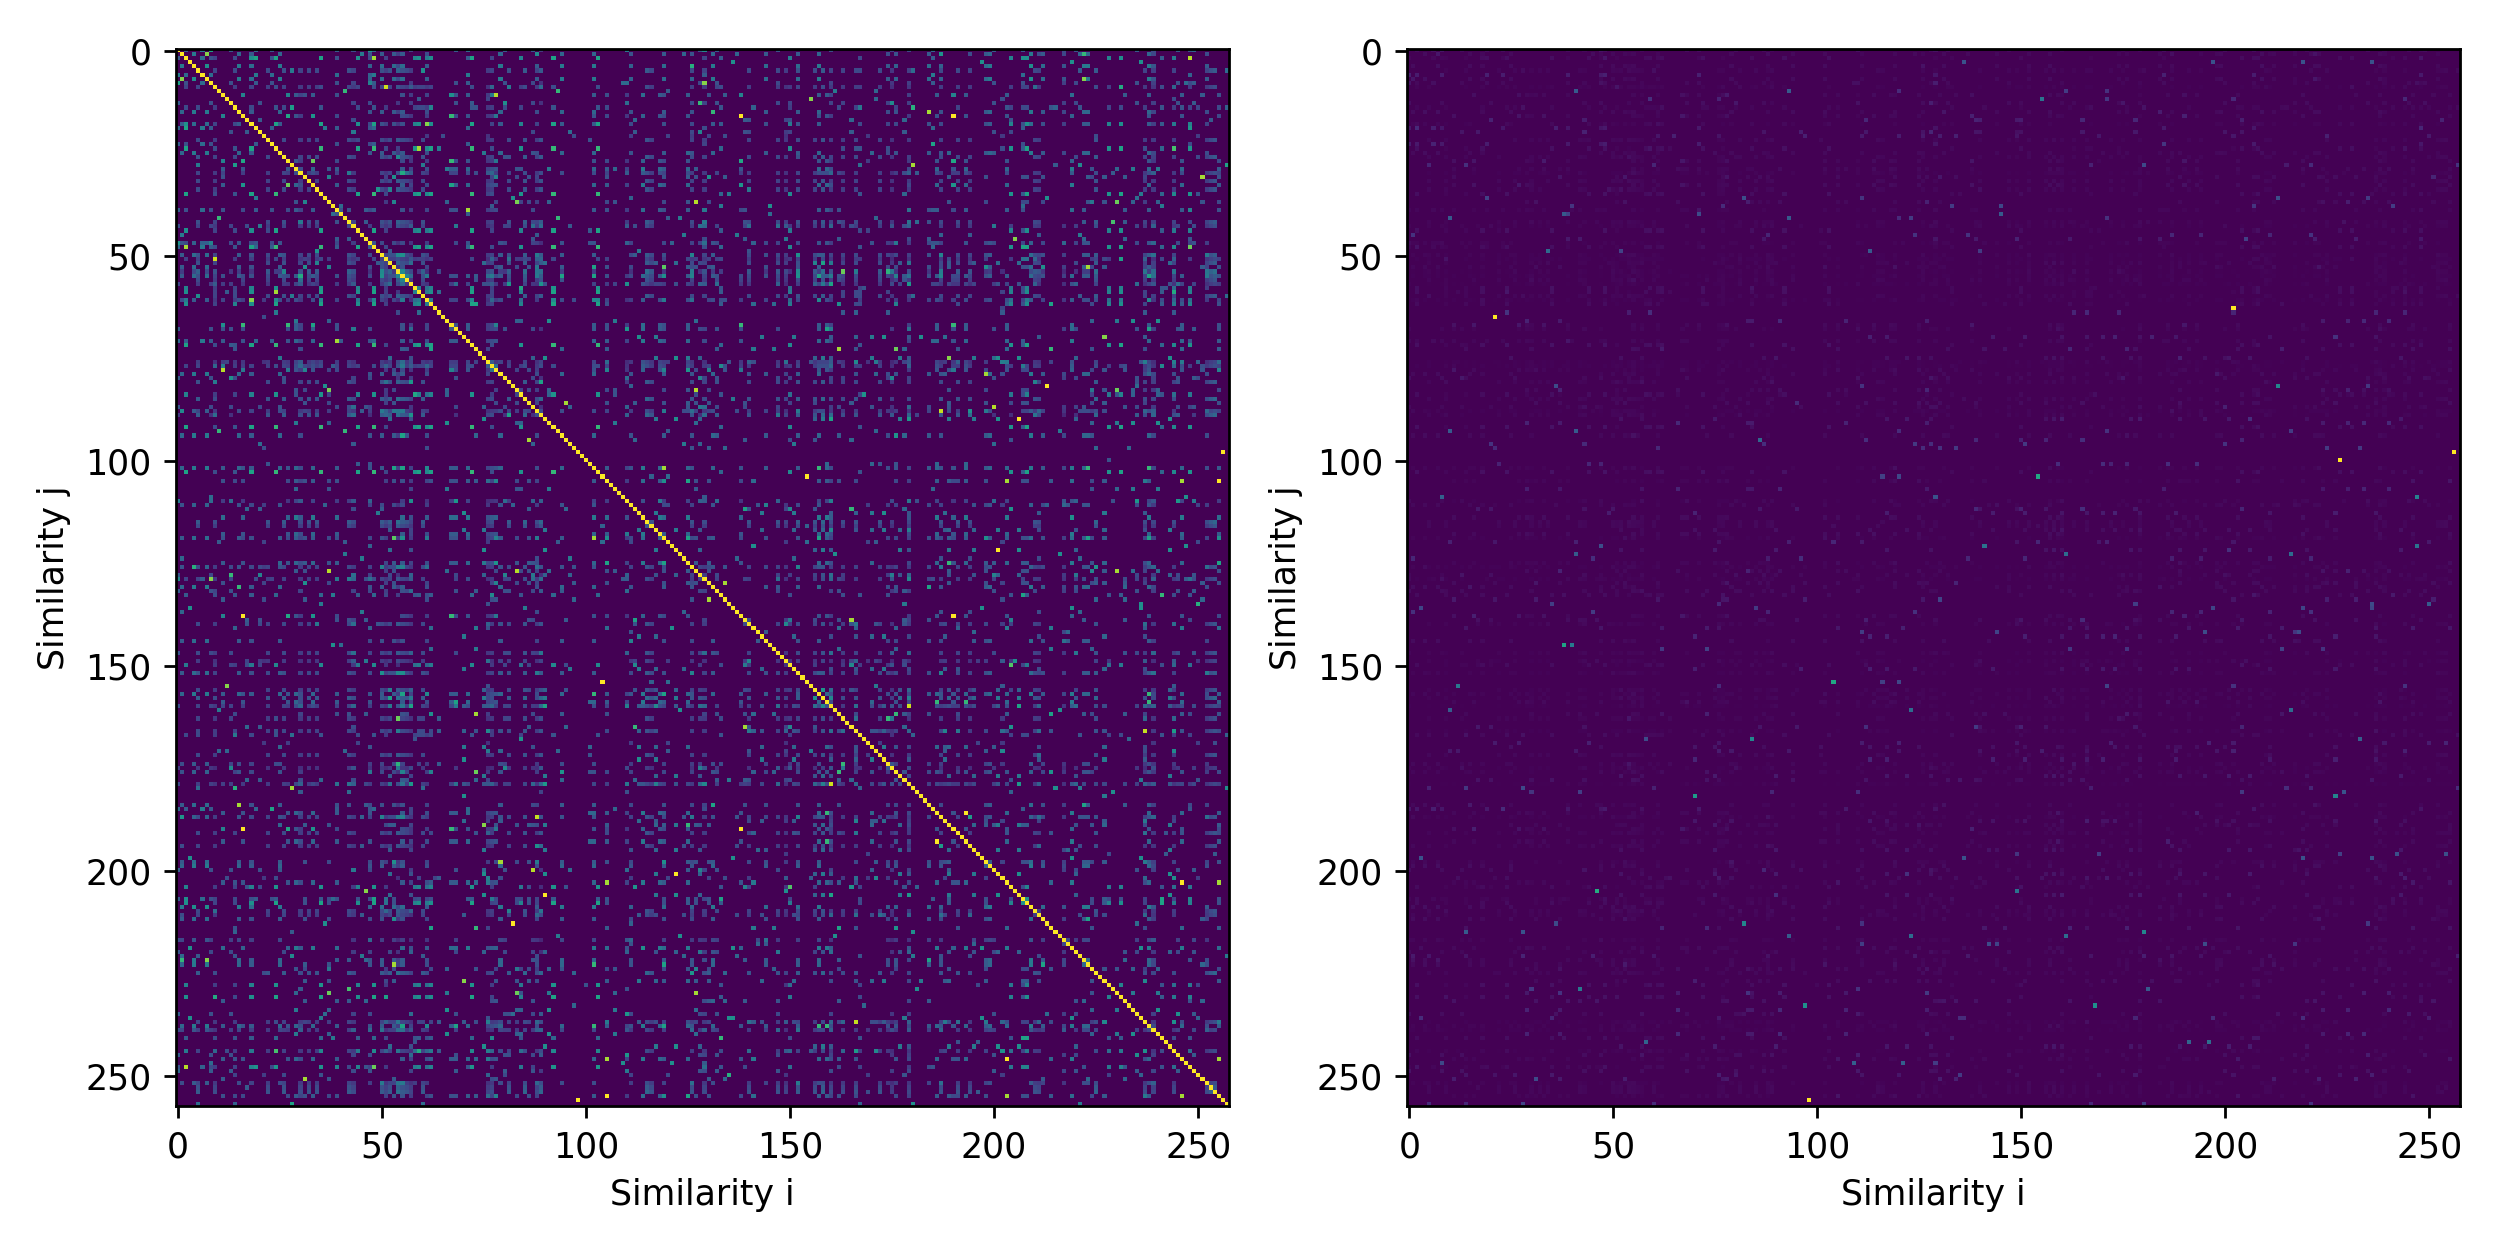

Text(0, 0.5, 'Similarity j')

In [22]:
Vectorst = np.zeros([N_samples, N_voc])


for i in range(N_samples):

    Vectorst[i,:] = vectorizer.transform([course_name1[i]]).toarray().ravel()
    

K1t= cos_sim(Vectorst)

K1_nodt = K1t -np.eye(N_samples)

Dt=np.sum(K1_nodt, axis=1)

D_invt = np.diag(1.0 / (Dt+1E-6))

K1_normt = D_invt @ K1_nodt

fig, ax = plt.subplots(figsize=[10,5], tight_layout=True, nrows=1, ncols=2)
ax[0].imshow(K1t, aspect='auto')

ax[0].set_xlabel('Similarity i')
ax[0].set_ylabel('Similarity j')

ax[1].imshow(K1_normt, aspect='auto')

ax[1].set_xlabel('Similarity i')
ax[1].set_ylabel('Similarity j')

### User feedback
Value between 0 and 5

In [27]:
AvgFeedback = (np.zeros([N_samples, N_samples])-2.5)*4

### Final Score

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
alpha= 0.4
beta= 0.4
gamma =0.2

FS = alpha*K1_nod +  beta* sigmoid(AvgFeedback) + gamma*K1_nodt

<IPython.core.display.Javascript object>


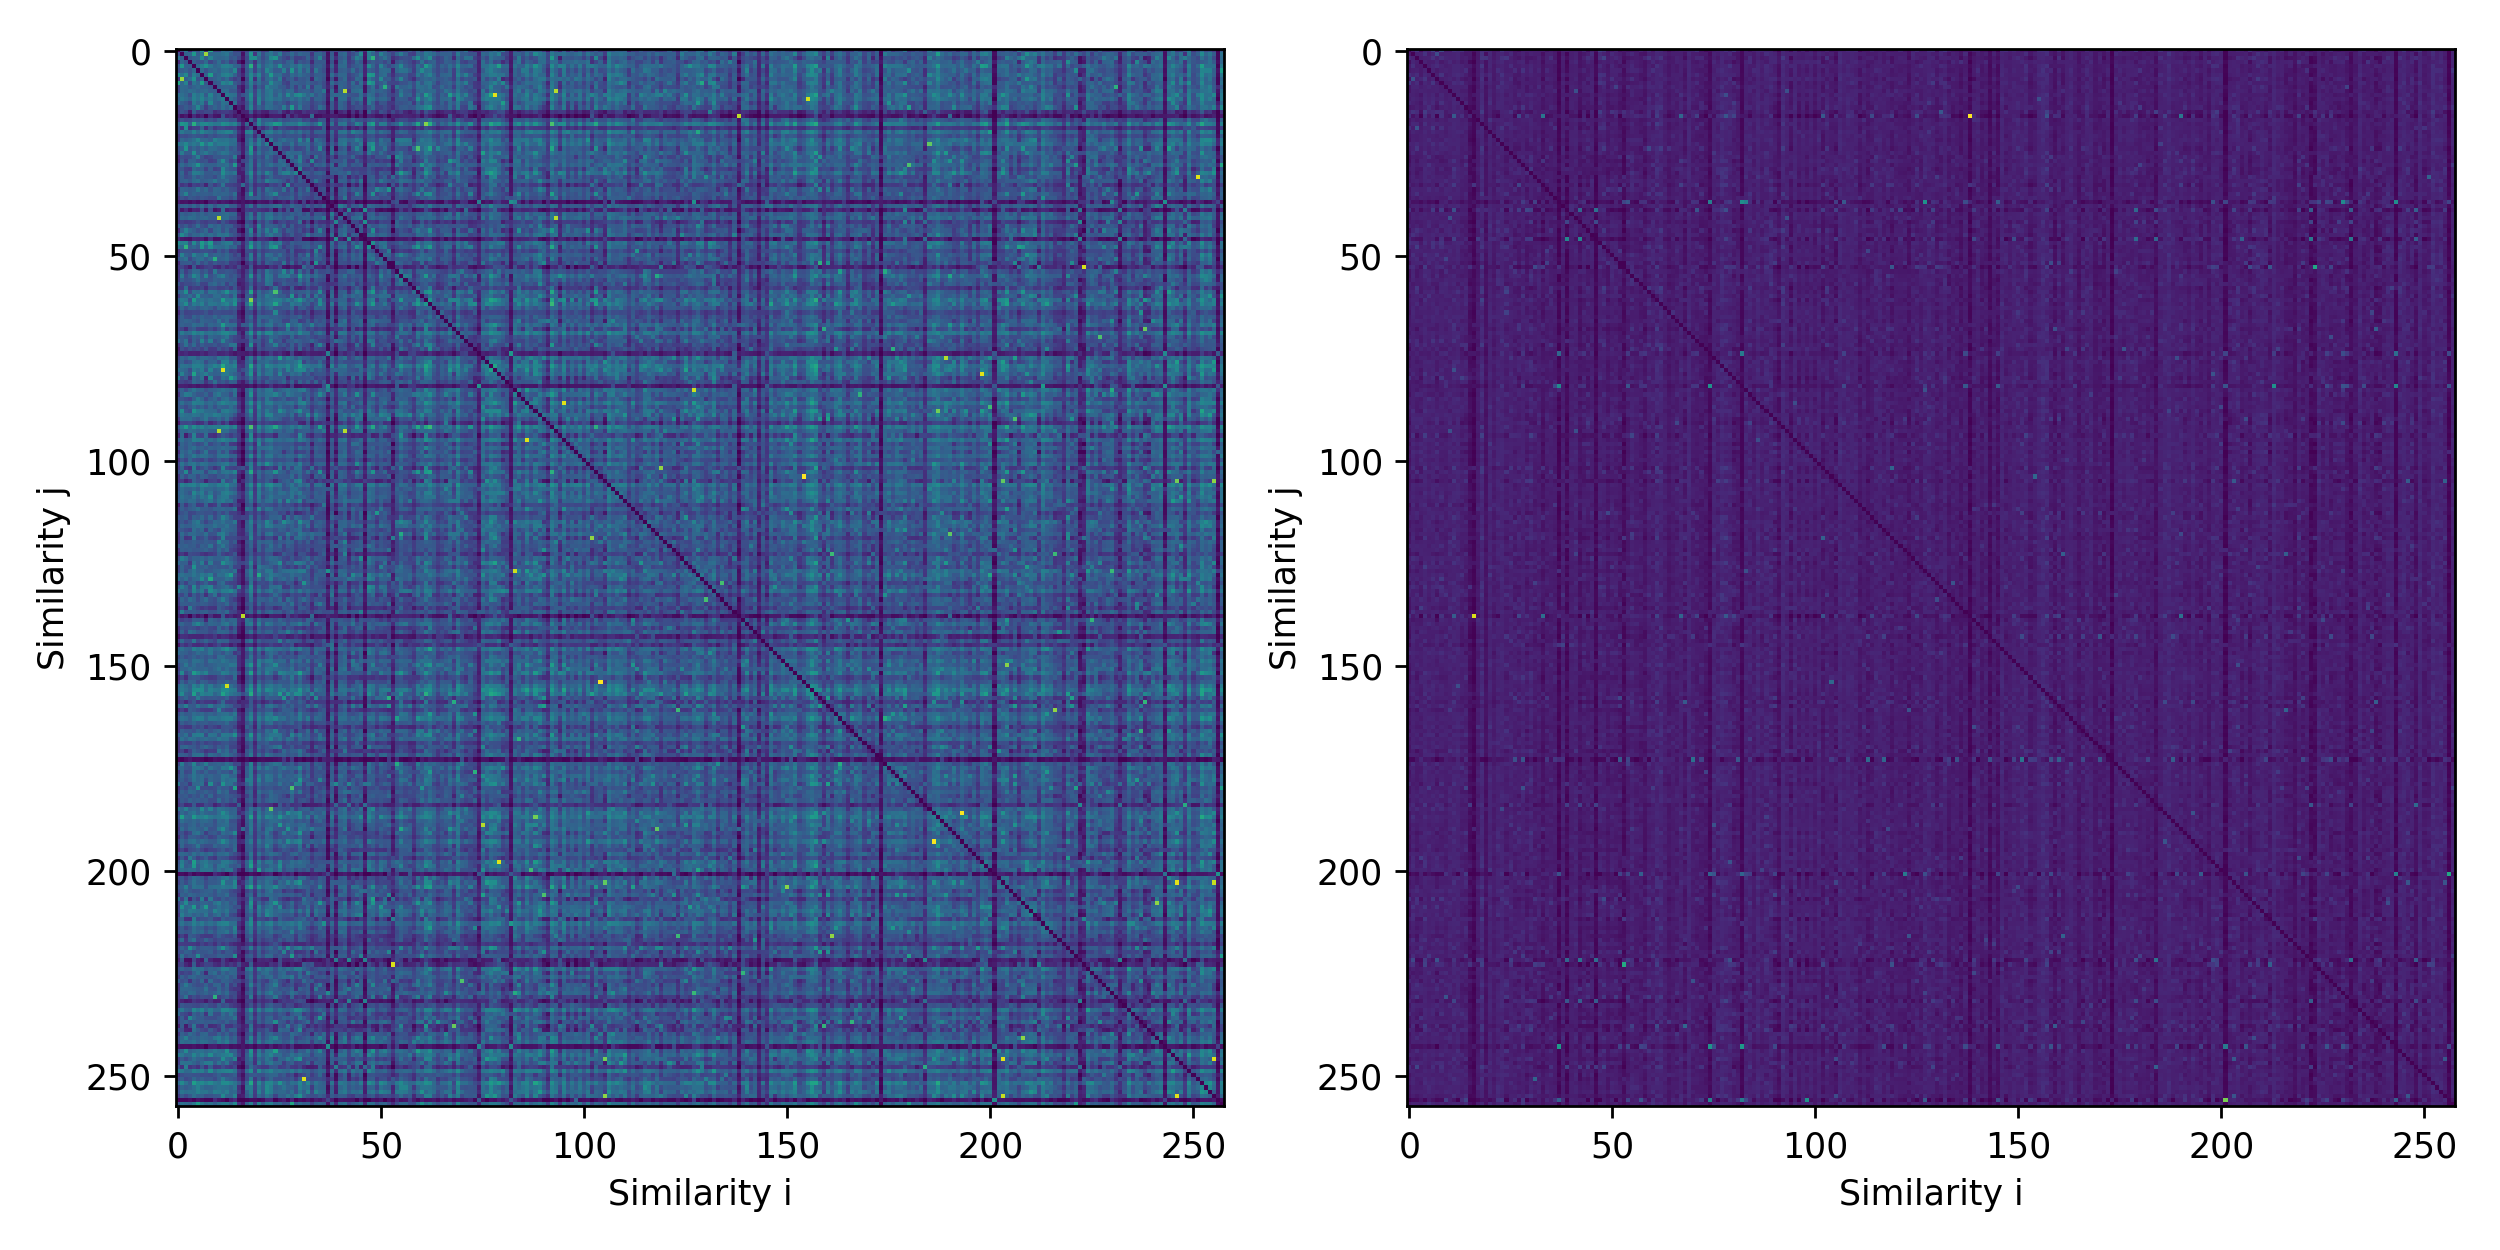

Text(0, 0.5, 'Similarity j')

In [30]:
Ds=np.sum(FS, axis=1)

D_invs = np.diag(1.0 / (Ds+1E-6))

K1_norms = D_invs @ FS

fig, ax = plt.subplots(figsize=[10,5], tight_layout=True, nrows=1, ncols=2)
ax[0].imshow(FS, aspect='auto')

ax[0].set_xlabel('Similarity i')
ax[0].set_ylabel('Similarity j')

ax[1].imshow(K1_norms, aspect='auto')

ax[1].set_xlabel('Similarity i')
ax[1].set_ylabel('Similarity j')

### Matching

Numerical Linear Algebra
A first course on computational linear algebra and applications.  Topics include floating-point arithmetic, algorithms and convergence, Gaussian elimination for linear systems, matrix decompositions (LU, Cholesky, QR), iterative methods for systems (Jacobi, Gaussâ€“Seidel), and approximation of eigenvalues (power method, QR-algorithm).  Theoretical topics such as vector spaces, inner products, norms, linear operators, matrix norms, eigenvalues, and canonical forms of matrices (Jordan, Schur) are reviewed as needed. Matlab is used to solve all numerical exercises; no previous experience with computer programming is required.

Numerical Analysis
Brief review of topics in elementary numerical analysis such as floating-point arithmetic, Gaussian elimination for linear equations, inter-polation and approximation. Core topics to be covered: numerical linear algebra including eigenvalue and linear least-squares problems, iterative algorithms for nonlinear equations an

<IPython.core.display.Javascript object>


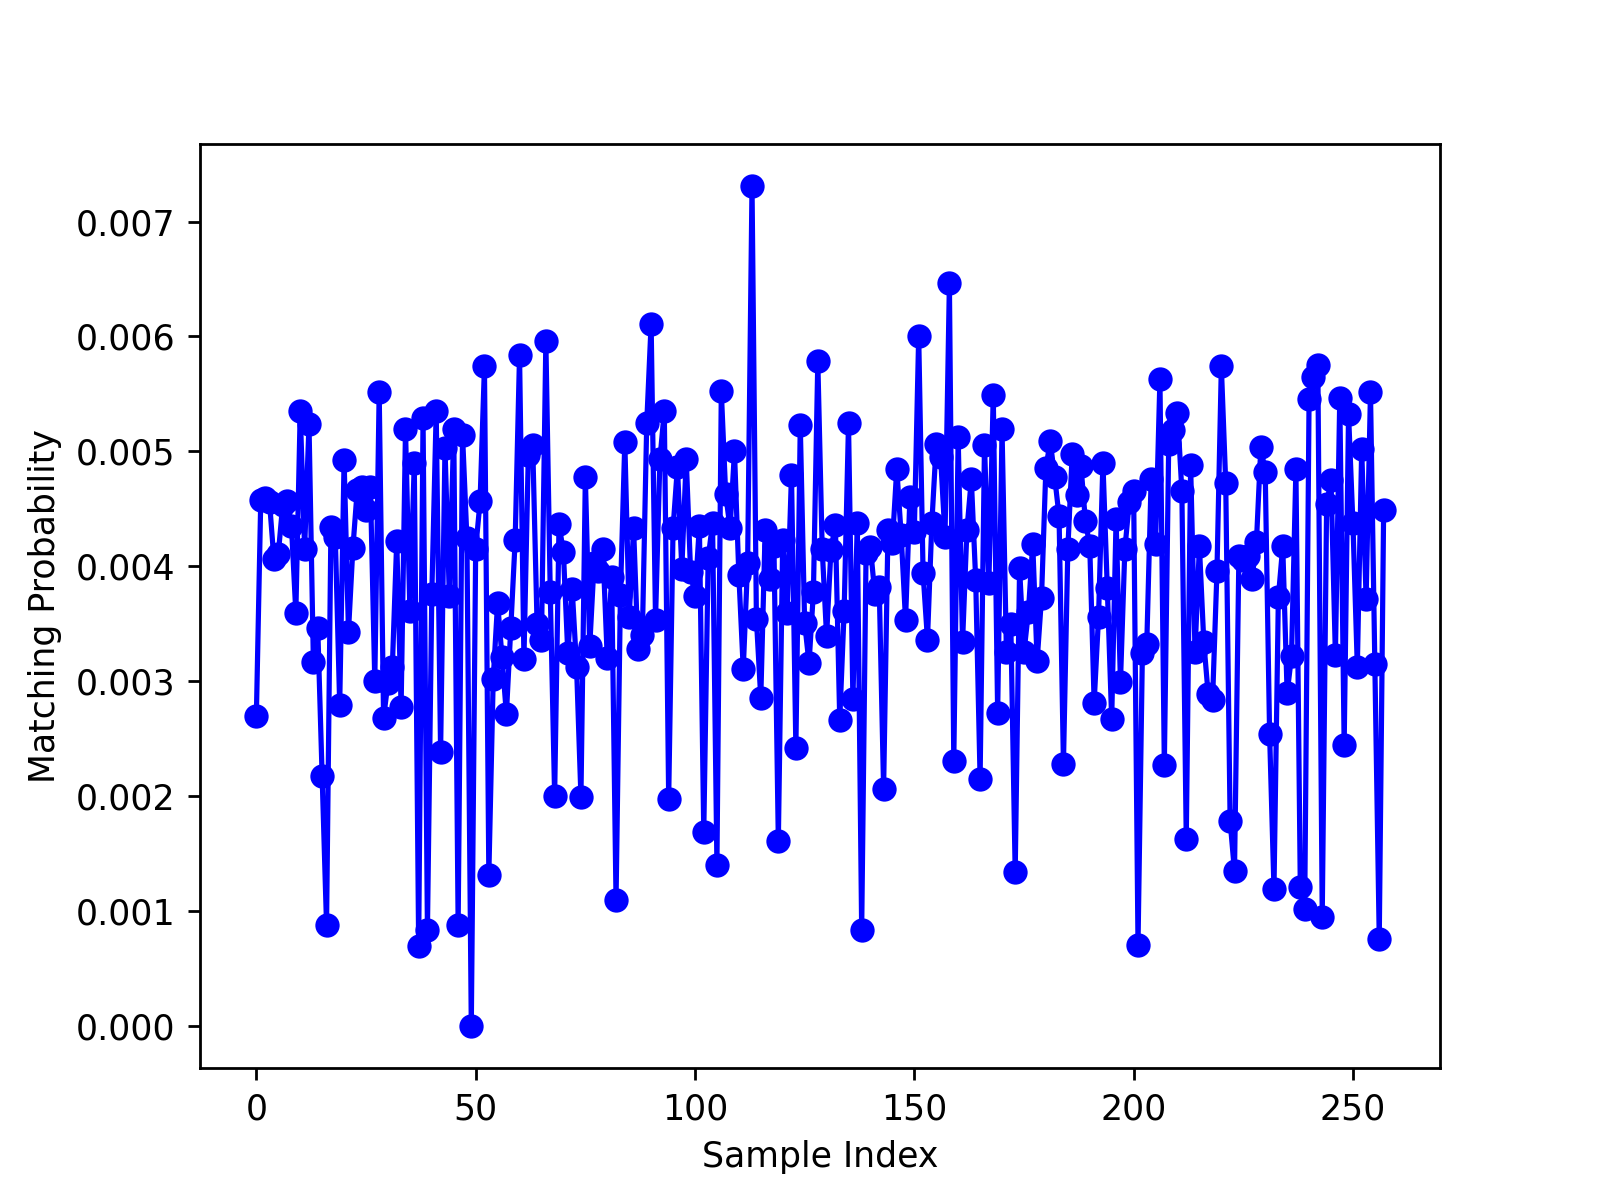

113

In [32]:
N_query = np.random.randint(N_samples)

print(course_name1[N_query])
print(desc1[N_query])
print('')
print(course_name1[np.argmax(K1_norms[N_query,:])])
print(desc1[np.argmax(K1_norms[N_query,:])])

fig, ax = plt.subplots()
ax.plot(K1_norm[N_query,:], '-o', c='blue')
ax.set_ylabel('Matching Probability')
ax.set_xlabel('Sample Index');



np.argmax(K1_norm[N_query,:])

In [15]:
# G1=nx.Graph()

# canyon_con=[]
# nodelist= list(np.arange(1, N_samples))
# for i in range(N_samples):
#     for j in range(N_samples):
#         if K1_norm[i,j]>0.001:
#             canyon_con.append((i,j, K1_norm[i,j]))
            
# G1.add_weighted_edges_from(canyon_con)

# fig, ax=plt.subplots()

# # fixed_positions={x: (minima[x,0], minima[x,1]) for x in np.arange(36)}

# # fixed_nodes = fixed_positions.keys()
# # fixed_nodes=np.arange(N_samples
# pos = nx.kamada_kawai_layout(G1)
# nx.draw_networkx(G1,pos, node_color='green', ax=ax)

In [16]:
print(course_name1[190])
print(desc1[190])
print('')
print(course_name1[55])
print(desc1[55])

Design Team Health-Tech Project I
A two-semester course sequence where juniors and seniors work with a team leader and a group of BME freshmen and sophomores, to solve open-ended problems in biomedical engineering. Upperclassmen are expected to apply their general knowledge and experience, and their knowledge in their concentration area, to teach lower classmen and to generate the solution to practical problems encountered in biomedical engineering.

Biomedical Engineering and Design
BME Freshmen only  -  Working in teams with upperclassmen this course (1) introduces biomedical engineering freshmen to an orderly method for analyzing and modeling biological systems and (2) introduces engineering principles to solve design problems that are biological, physiological, and/or medical.  Freshmen are expected to use the informational content being taught in calculus, physics and chemistry and to apply this knowledge to the solution of practical problems encountered in biomedical engineering.

### Encoding to Decoding and backwards

In [17]:
# vector2 =  vectorizer.transform(text1)
# v2= vector2.toarray().ravel()

# print(text1)

# for j in range(v2.shape[0]):


#     if v2[j]!=0:
#         for i in range(v2[j]):
#             print(list(vocc.keys())[list(vocc.values()).index(j)])